# Project 3 from Data Analysis with Python
https://replit.com/@JeremiahZhang/boilerplate-medical-data-visualizer#medical_data_visualizer.py

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import seaborn as sns

# Import Data

In [3]:
df = pd.read_csv('medical_examination.csv', delimiter=',')

In [4]:
df.shape

(70000, 13)

In [5]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## sol 1

> Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.

In [9]:
# Add 'overweight' column
df['BMI'] = df['weight'] / ((df['height'] / 100) ** 2)

In [10]:
df2 = df.copy()

In [11]:
df2.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight,BMI
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,None,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,None,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,None,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,None,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,None,23.011177


In [12]:
conditions = [
    (df2['BMI'] <= 25),
    (df2['BMI'] > 25)
]

values = [0, 1]

In [13]:
df2['overweight'] = np.select(conditions, values)

In [14]:
df2.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight,BMI
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0,23.011177


In [8]:
df.head(7)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,None
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,None
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,None
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,None
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,None
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0,None
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0,None


### Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.

Cholesterol: 胆固醇
Glucose：葡萄糖

https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/

In [17]:
conditions_chole = [
    (df2['cholesterol'] == 1),
    (df2['cholesterol'] > 1),
]

values_chole = [0, 1]

In [18]:
df2['cholesterol'] = np.select(conditions_chole, values_chole)

In [19]:
df2.head(7)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight,BMI
0,0,18393,2,168,62.0,110,80,0,1,0,0,1,0,0,21.967120
1,1,20228,1,156,85.0,140,90,1,1,0,0,1,1,1,34.927679
2,2,18857,1,165,64.0,130,70,1,1,0,0,0,1,0,23.507805
3,3,17623,2,169,82.0,150,100,0,1,0,0,1,1,1,28.710479
4,4,17474,1,156,56.0,100,60,0,1,0,0,0,0,0,23.011177
5,8,21914,1,151,67.0,120,80,1,2,0,0,0,0,1,29.384676
6,9,22113,1,157,93.0,130,80,1,1,0,0,1,0,1,37.729725


In [20]:
conditions_gluc =[
    (df2['gluc'] == 1),
    (df2['gluc'] > 1)
]

values_gluc = [0, 1]

In [21]:
df2['gluc'] = np.select(conditions_gluc, values_gluc)

In [22]:
df2.head(7)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight,BMI
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0,21.967120
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1,34.927679
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0,23.507805
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1,28.710479
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0,23.011177
5,8,21914,1,151,67.0,120,80,1,1,0,0,0,0,1,29.384676
6,9,22113,1,157,93.0,130,80,1,0,0,0,1,0,1,37.729725


# Draw Categorical Plot

Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's catplot(). The dataset should be split by 'Cardio' so there is one chart for each cardio value. The chart should look like examples/Figure_1.png.

Learning:  
[1] [Reshaping a DataFrame using Pandas melt()](https://towardsdatascience.com/reshaping-a-dataframe-using-pandas-melt-83a151ce1907)   
[2] [How to Select Multiple Columns in Pandas (With Examples)](https://www.statology.org/pandas-select-multiple-columns/)   

In [23]:
df_new = df2[['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke', 'cardio']]

In [24]:
df_new.head()

,active,alco,cholesterol,gluc,overweight,smoke,cardio
0,1,0,0,0,0,0,0
1,1,0,1,0,1,0,1
2,0,0,1,0,0,0,1
3,1,0,0,0,1,0,1
4,0,0,0,0,0,0,0


In [25]:
df_new.melt()

,variable,value
0,active,1
1,active,1
2,active,0
3,active,1
4,active,0
...,...,...
489995,cardio,0
489996,cardio,1
489997,cardio,1
489998,cardio,1


In [31]:
df_cat = df_new.melt(
    id_vars='cardio',
)

In [32]:
df_cat.head()

,cardio,variable,value
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0


In [33]:
df_cat.shape

(420000, 3)

In [40]:
df_cat_new = df_cat.groupby(['cardio', 'variable', 'value'])['value'].count().reset_index(name='total')

In [41]:
df_cat_new.head()

,cardio,variable,value,total
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330


Learning source:  
1. [seaborn.catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html)
2. [Plotting with categorical data — seaborn 0.11.2 documentation](https://seaborn.pydata.org/tutorial/categorical.html#categorical-tutorial)
3. [Python Seaborn - Catplot - GeeksforGeeks](https://www.geeksforgeeks.org/python-seaborn-catplot/)
4. [ catplot() in Seaborn: Categorical data visualization guide.](https://towardsdatascience.com/mastering-catplot-in-seaborn-categorical-data-visualization-guide-abab7b2067af)

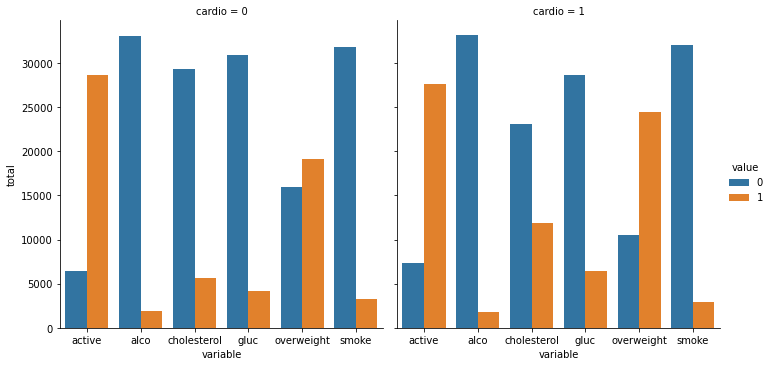

In [65]:
sns.catplot(x="variable", y="total", col="cardio", 
            data=df_cat_new, hue="value", kind="bar")

## Draw Heat Map

Clean the data. Filter out the following patient segments that represent incorrect data:

    diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
    height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
    height is more than the 97.5th percentile
    weight is less than the 2.5th percentile
    weight is more than the 97.5th percentile


In [47]:
mask = (df2['ap_lo'] <= df2['ap_hi']) & \
       (df2['height'] >= df2['height'].quantile(0.025)) & \
       (df2['height'] <= df2['height'].quantile(0.975)) & \
       (df2['weight'] >= df2['weight'].quantile(0.025)) & \
       (df2['weight'] <= df2['weight'].quantile(0.975))

In [48]:
df_heat = df2[mask]

In [49]:
df_heat.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight,BMI
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0,21.967120
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1,34.927679
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0,23.507805
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1,28.710479
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0,23.011177


In [51]:
df_heat.shape

(63259, 15)

In [52]:
df_heat = df_heat.drop(columns='BMI')
df_heat.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


[Calculate and Plot a Correlation Matrix in Python and Pandas • datagy](https://datagy.io/python-correlation-matrix/)

In [60]:
corr = df_heat.corr().round(1)

In [61]:
mask = np.triu(np.ones_like(corr))

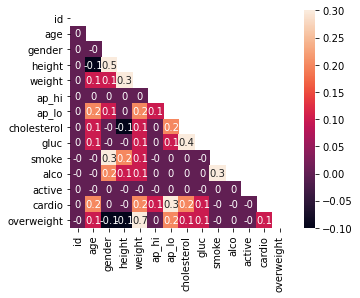

In [63]:
sns.heatmap(corr, annot=True, mask=mask, vmax=0.3, square=True)
plt.show()